In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [66]:
%%cmd
pip install statsmodels

Microsoft Windows [Version 10.0.26100.2605]
(c) Microsoft Corporation. All rights reserved.

C:\Users\����ᠭ��>pip install statsmodels
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 9.9/9.9 MB 10.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



C:\Users\����ᠭ��>

In [54]:
data = pd.read_csv("pss5e1/train.csv")
data

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0
...,...,...,...,...,...,...
230125,230125,2016-12-31,Singapore,Premium Sticker Mart,Holographic Goose,466.0
230126,230126,2016-12-31,Singapore,Premium Sticker Mart,Kaggle,2907.0
230127,230127,2016-12-31,Singapore,Premium Sticker Mart,Kaggle Tiers,2299.0
230128,230128,2016-12-31,Singapore,Premium Sticker Mart,Kerneler,1242.0


In [55]:
goose_data = data[(data["product"] == "Holographic Goose") & (data["store"] == "Stickers for Less")& (data['country']=='Canada')]


In [72]:
data['date'] = pd.to_datetime(data['date'], format="%Y-%m-%d")

data.set_index('date', inplace=True)
# Построение графика

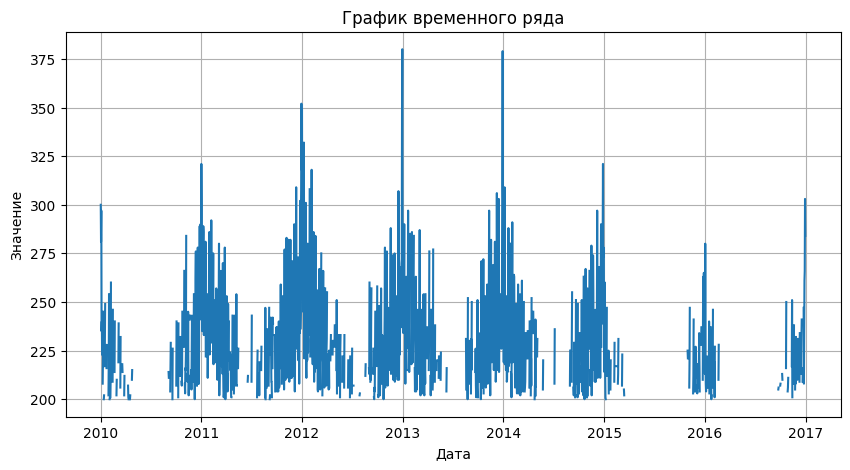

In [57]:
plt.figure(figsize=(10, 5))
plt.plot(goose_data.index, goose_data.num_sold)
plt.title('График временного ряда')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.grid()
plt.show()

In [35]:
goose_data

,id,country,store,product,num_sold
date,,,,,
2010-01-01,5,Canada,Stickers for Less,Holographic Goose,300.0
2010-01-01,20,Finland,Stickers for Less,Holographic Goose,311.0
2010-01-01,35,Italy,Stickers for Less,Holographic Goose,228.0
2010-01-01,50,Kenya,Stickers for Less,Holographic Goose,5.0
2010-01-01,65,Norway,Stickers for Less,Holographic Goose,579.0
...,...,...,...,...,...
2016-12-31,230060,Finland,Stickers for Less,Holographic Goose,289.0
2016-12-31,230075,Italy,Stickers for Less,Holographic Goose,215.0
2016-12-31,230090,Kenya,Stickers for Less,Holographic Goose,10.0


In [36]:
data.country.nunique()

6

In [37]:
data.store.nunique()

3

In [39]:
data['product'].nunique()

5

In [73]:
data.index

DatetimeIndex(['2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01', '2010-01-01', '2010-01-01',
               '2010-01-01', '2010-01-01',
               ...
               '2016-12-31', '2016-12-31', '2016-12-31', '2016-12-31',
               '2016-12-31', '2016-12-31', '2016-12-31', '2016-12-31',
               '2016-12-31', '2016-12-31'],
              dtype='datetime64[ns]', name='date', length=230130, freq=None)

In [90]:
x = pd.DataFrame()
for pr in data["product"].unique():
    for st in data["store"].unique():
        for ct in data["country"].unique():
            x[pr+st+ct] = data[(data["product"] == pr) & (data["store"] == st)& (data['country']==ct)]["num_sold"].to_list()


In [91]:
x

,Holographic GooseDiscount StickersCanada,Holographic GooseDiscount StickersFinland,Holographic GooseDiscount StickersItaly,Holographic GooseDiscount StickersKenya,Holographic GooseDiscount StickersNorway,Holographic GooseDiscount StickersSingapore,Holographic GooseStickers for LessCanada,Holographic GooseStickers for LessFinland,Holographic GooseStickers for LessItaly,Holographic GooseStickers for LessKenya,...,Kerneler Dark ModeStickers for LessItaly,Kerneler Dark ModeStickers for LessKenya,Kerneler Dark ModeStickers for LessNorway,Kerneler Dark ModeStickers for LessSingapore,Kerneler Dark ModePremium Sticker MartCanada,Kerneler Dark ModePremium Sticker MartFinland,Kerneler Dark ModePremium Sticker MartItaly,Kerneler Dark ModePremium Sticker MartKenya,Kerneler Dark ModePremium Sticker MartNorway,Kerneler Dark ModePremium Sticker MartSingapore
0,NaN,150.0,110.0,NaN,261.0,150.0,300.0,311.0,228.0,5.0,...,778.0,19.0,1672.0,1080.0,1213.0,1047.0,861.0,22.0,2376.0,1255.0
1,NaN,127.0,107.0,NaN,274.0,146.0,281.0,287.0,226.0,5.0,...,691.0,20.0,1907.0,971.0,1217.0,1120.0,885.0,23.0,2050.0,1224.0
2,NaN,152.0,122.0,NaN,267.0,155.0,297.0,308.0,236.0,5.0,...,747.0,20.0,1879.0,987.0,1188.0,1234.0,935.0,22.0,2299.0,1314.0
3,NaN,113.0,91.0,NaN,228.0,123.0,235.0,239.0,187.0,NaN,...,578.0,16.0,1532.0,839.0,1046.0,931.0,697.0,18.0,1816.0,927.0
4,NaN,116.0,77.0,NaN,206.0,111.0,240.0,227.0,180.0,NaN,...,580.0,16.0,1488.0,795.0,894.0,941.0,753.0,18.0,1567.0,962.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,NaN,117.0,75.0,NaN,175.0,153.0,233.0,230.0,170.0,7.0,...,523.0,25.0,1328.0,1016.0,935.0,966.0,563.0,31.0,1419.0,1179.0
2553,NaN,130.0,81.0,NaN,186.0,158.0,261.0,315.0,172.0,8.0,...,594.0,26.0,1316.0,1062.0,927.0,1046.0,752.0,33.0,1726.0,1177.0
2554,NaN,138.0,103.0,NaN,231.0,194.0,266.0,293.0,193.0,8.0,...,590.0,29.0,1375.0,1178.0,1110.0,1149.0,760.0,35.0,1696.0,1421.0
2555,NaN,138.0,99.0,NaN,223.0,184.0,303.0,303.0,199.0,8.0,...,666.0,31.0,1622.0,1357.0,1169.0,1321.0,766.0,40.0,1849.0,1518.0


In [92]:
x = x.fillna(x.mean())

In [93]:
x

,Holographic GooseDiscount StickersCanada,Holographic GooseDiscount StickersFinland,Holographic GooseDiscount StickersItaly,Holographic GooseDiscount StickersKenya,Holographic GooseDiscount StickersNorway,Holographic GooseDiscount StickersSingapore,Holographic GooseStickers for LessCanada,Holographic GooseStickers for LessFinland,Holographic GooseStickers for LessItaly,Holographic GooseStickers for LessKenya,...,Kerneler Dark ModeStickers for LessItaly,Kerneler Dark ModeStickers for LessKenya,Kerneler Dark ModeStickers for LessNorway,Kerneler Dark ModeStickers for LessSingapore,Kerneler Dark ModePremium Sticker MartCanada,Kerneler Dark ModePremium Sticker MartFinland,Kerneler Dark ModePremium Sticker MartItaly,Kerneler Dark ModePremium Sticker MartKenya,Kerneler Dark ModePremium Sticker MartNorway,Kerneler Dark ModePremium Sticker MartSingapore
0,NaN,150.0,110.0,NaN,261.0,150.0,300.0,311.0,228.0,5.000000,...,778.0,19.0,1672.0,1080.0,1213.0,1047.0,861.0,22.0,2376.0,1255.0
1,NaN,127.0,107.0,NaN,274.0,146.0,281.0,287.0,226.0,5.000000,...,691.0,20.0,1907.0,971.0,1217.0,1120.0,885.0,23.0,2050.0,1224.0
2,NaN,152.0,122.0,NaN,267.0,155.0,297.0,308.0,236.0,5.000000,...,747.0,20.0,1879.0,987.0,1188.0,1234.0,935.0,22.0,2299.0,1314.0
3,NaN,113.0,91.0,NaN,228.0,123.0,235.0,239.0,187.0,5.470392,...,578.0,16.0,1532.0,839.0,1046.0,931.0,697.0,18.0,1816.0,927.0
4,NaN,116.0,77.0,NaN,206.0,111.0,240.0,227.0,180.0,5.470392,...,580.0,16.0,1488.0,795.0,894.0,941.0,753.0,18.0,1567.0,962.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,NaN,117.0,75.0,NaN,175.0,153.0,233.0,230.0,170.0,7.000000,...,523.0,25.0,1328.0,1016.0,935.0,966.0,563.0,31.0,1419.0,1179.0
2553,NaN,130.0,81.0,NaN,186.0,158.0,261.0,315.0,172.0,8.000000,...,594.0,26.0,1316.0,1062.0,927.0,1046.0,752.0,33.0,1726.0,1177.0
2554,NaN,138.0,103.0,NaN,231.0,194.0,266.0,293.0,193.0,8.000000,...,590.0,29.0,1375.0,1178.0,1110.0,1149.0,760.0,35.0,1696.0,1421.0
2555,NaN,138.0,99.0,NaN,223.0,184.0,303.0,303.0,199.0,8.000000,...,666.0,31.0,1622.0,1357.0,1169.0,1321.0,766.0,40.0,1849.0,1518.0


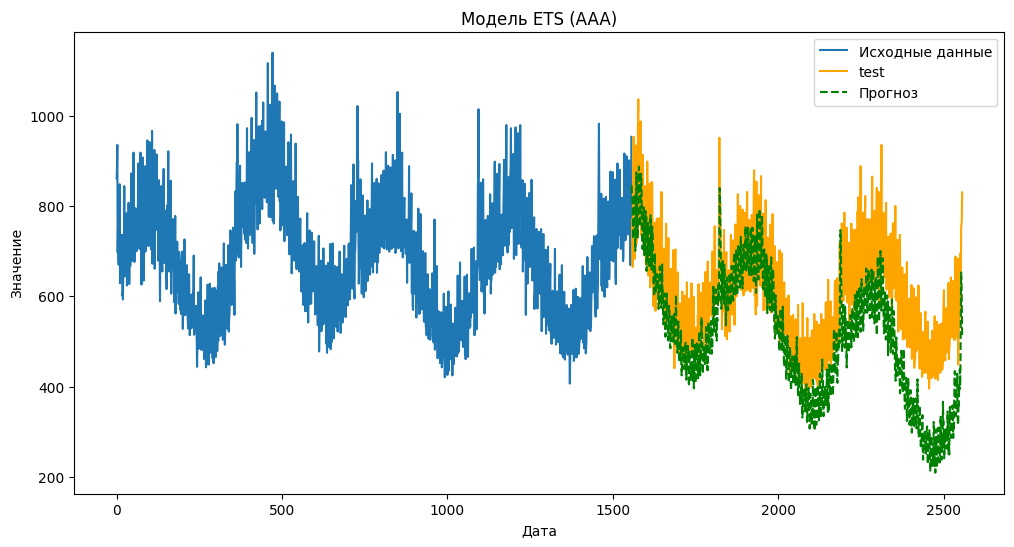

In [94]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
time_for_forecast =1000
df = pd.DataFrame(x)
# Построение модели ETS (AAA)
model = sm.tsa.ExponentialSmoothing(df['Kerneler Dark ModePremium Sticker MartItaly'][:-time_for_forecast], trend='add', seasonal='add', seasonal_periods=365)
fit = model.fit()

# Прогнозирование
forecast = fit.forecast(steps=time_for_forecast)

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(df.index[:-time_for_forecast], df['Kerneler Dark ModePremium Sticker MartItaly'][:-time_for_forecast], label='Исходные данные')
plt.plot(df.index[-time_for_forecast+1:], df['Kerneler Dark ModePremium Sticker MartItaly'][-time_for_forecast+1:], label='test', color='orange')
plt.plot(forecast, label='Прогноз', color='green', linestyle='--')
plt.title('Модель ETS (AAA)')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()


In [81]:
df['Holographic GooseDiscount StickersCanada'][:-100]

0       300.000000
1       281.000000
2       297.000000
3       235.000000
4       240.000000
           ...    
2452    228.816653
2453    228.816653
2454    228.816653
2455    228.816653
2456    228.816653
Name: Holographic GooseDiscount StickersCanada, Length: 2457, dtype: float64

TypeError: unsupported operand type(s) for +: 'int' and 'Timedelta'

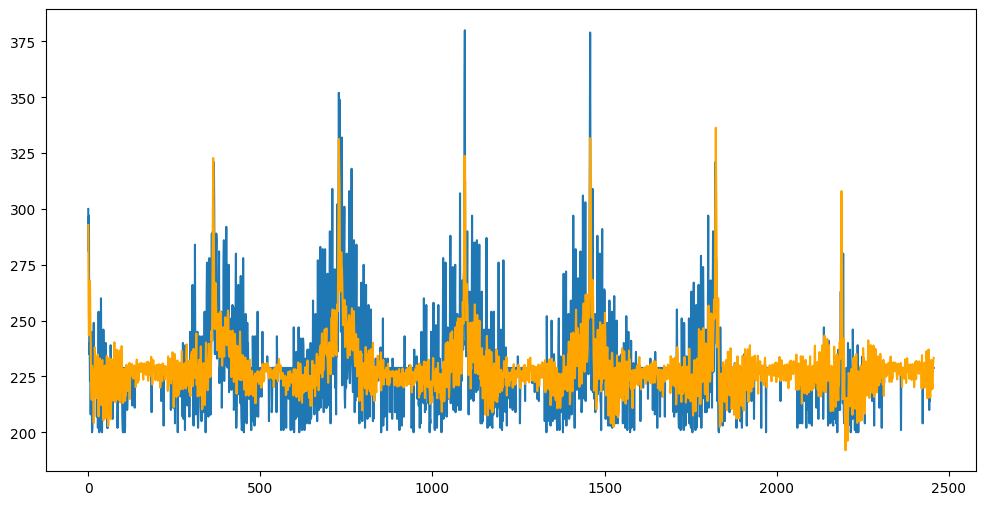

In [82]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Предположим, что x — это ваш исходный набор данных
# Пример создания DataFrame
# x = np.random.rand(2457)  # Пример данных, замените на ваши
# df = pd.DataFrame(x, columns=['Holographic GooseDiscount StickersCanada'])

# Построение модели ETS (AAA)
model = sm.tsa.ExponentialSmoothing(df['Holographic GooseDiscount StickersCanada'][:-100], 
                                     trend='add', 
                                     seasonal='add', 
                                     seasonal_periods=365)
fit = model.fit()

# Прогнозирование
forecast = fit.forecast(steps=100)

# Визуализация
plt.figure(figsize=(12, 6))

# Исходные данные для графика
plt.plot(df.index[:-100], df['Holographic GooseDiscount StickersCanada'][:-100], label='Исходные данные')

# Подогнанные значения
plt.plot(df.index[:-100], fit.fittedvalues[-99, label='Подогнанные значения', color='orange')

# Прогноз
forecast_index = pd.date_range(start=df.index[-100] + pd.Timedelta(days=1), periods=100)
plt.plot(forecast_index, forecast, label='Прогноз', color='green', linestyle='--')

plt.title('Модель ETS (AAA)')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()


In [96]:
df['Kerneler Dark ModePremium Sticker MartItaly'][-time_for_forecast+1:] - forecast

1557           NaN
1558    -68.864850
1559    -41.318960
1560   -135.786459
1561     86.336325
           ...    
2552     -7.948899
2553     98.912403
2554    131.638137
2555    182.117655
2556    318.390527
Length: 1000, dtype: float64

C:\Program Files\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 24s 266ms/step - loss: 0.0216
Epoch 2/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 271ms/step - loss: 0.0084
Epoch 3/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 268ms/step - loss: 0.0083
Epoch 4/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 271ms/step - loss: 0.0076
Epoch 5/5
71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 270ms/step - loss: 0.0080
71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step


ValueError: x and y must have same first dimension, but have shapes (999,) and (299,)

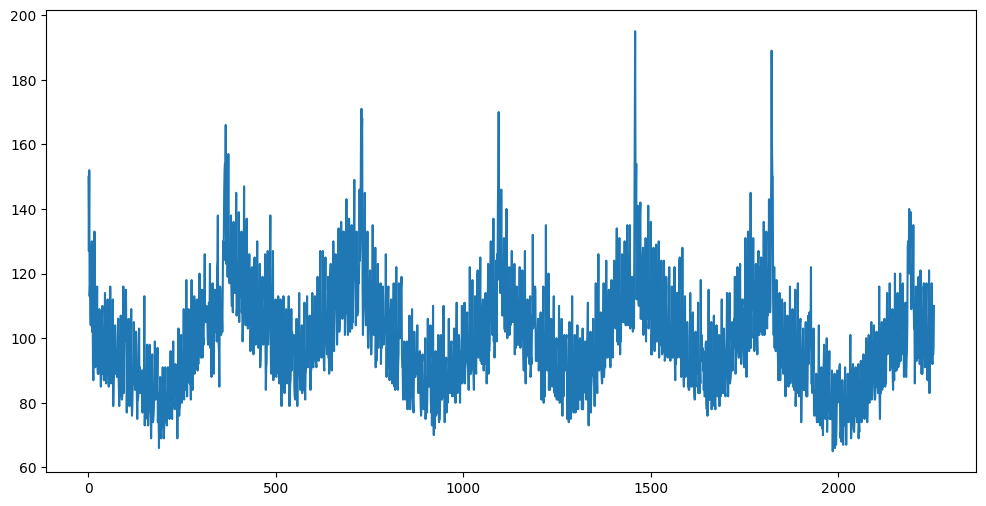

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Предположим, что df — это ваш DataFrame с временными рядами
# Пример создания DataFrame
# df = pd.DataFrame({'Holographic GooseDiscount StickersCanada': [...]})

# Нормализация данных
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df['Holographic GooseDiscount StickersFinland'].values.reshape(-1, 1))

# Создание последовательностей
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 300  # Количество временных шагов для входа
X, y = create_dataset(data_scaled, time_step)

# Изменение формы данных для LSTM [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Создание модели LSTM
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Dense(1))

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
model.fit(X, y, epochs=5, batch_size=32)

# Прогнозирование
train_predict = model.predict(X)
train_predict = scaler.inverse_transform(train_predict)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(df.index[:-time_step-1], df['Holographic GooseDiscount StickersFinland'][:-time_step-1], label='Исходные данные')
plt.plot(df.index[-time_for_forecast+1:], df['Holographic GooseDiscount StickersFinland'][-time_step+1:], label='test', color='orange')
plt.plot(df.index[time_step:-1], train_predict[time_step:-1], label='Прогноз', color='orange')
plt.title('Прогноз с использованием LSTM')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()


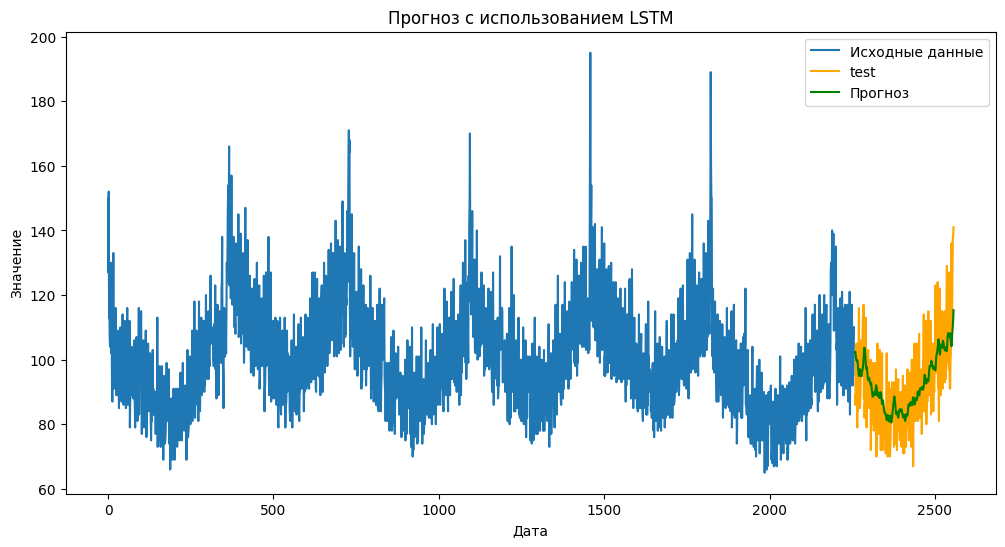

In [125]:
plt.figure(figsize=(12, 6))
plt.plot(df.index[:-time_step-1], df['Holographic GooseDiscount StickersFinland'][:-time_step-1], label='Исходные данные')
plt.plot(df.index[-time_step+1:], df['Holographic GooseDiscount StickersFinland'][-time_step+1:], label='test', color='orange')
plt.plot(df.index[-time_step+1:], train_predict[-time_step+1:], label='Прогноз', color='green')
plt.title('Прогноз с использованием LSTM')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()


In [105]:
train_predict[-time_step+1:]-df['Holographic GooseDiscount StickersFinland'][-time_step+1:]

ValueError: Data must be 1-dimensional, got ndarray of shape (299, 299) instead

In [126]:
predicted = train_predict[-time_step+1:].flatten()
actual = df['Holographic GooseDiscount StickersFinland'][-time_step+1:].to_numpy()

In [127]:
np.mean(np.abs((actual - predicted) / actual)) * 100

9.483874410183772

In [129]:
for i in range(11):
    print((i**10)%11)

0
1
1
1
1
1
1
1
1
1
1


In [166]:
(3**168-1)%(16*5*29*1093*547*16493)

0

In [167]:
(3**140-1)%(1093*29*5*16*547*16493)

0

In [165]:
(3**168-1)

143341119796678074027577337316118932770382415738332565090012937927177499182473760